In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plant function f(u)
def plant_function(u):
    return 0.6 * np.sin(np.pi * u) + 0.3 * np.sin(3 * np.pi * u) + 0.1 * np.sin(5 * np.pi * u)

# Define the plant equation y_p
def plant_output(y_p_k, y_p_k_minus_1, u_k):
    return 0.3 * y_p_k + 0.6 * y_p_k_minus_1 + plant_function(u_k)

In [99]:
# Neural network class with backpropagation
class SimpleNeuralNetwork:
    def __init__(self):
        # Initialize weights and biases
        self.w1 = np.random.randn(1, 20) * 0.01
        self.b1 = np.zeros((1, 20))
        self.w2 = np.random.randn(20, 10) * 0.01
        self.b2 = np.zeros((1, 10))
        self.w3 = np.random.randn(10, 1) * 0.01
        self.b3 = np.zeros((1, 1))
        
        # Learning rate
        self.eta = 0.25
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward(self, x):
        # Forward pass
        self.z1 = x.dot(self.w1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1.dot(self.w2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        self.z3 = self.a2.dot(self.w3) + self.b3
        output = self.z3  # Linear output for regression
        return output
    
    def backward(self, x, y, output):
        # Backward pass
        d_output = output - y
        d_w3 = self.a2.T.dot(d_output)
        d_b3 = np.sum(d_output, axis=0, keepdims=True)
        
        d_a2 = d_output.dot(self.w3.T)
        d_z2 = d_a2 * self.sigmoid_derivative(self.z2)
        d_w2 = self.a1.T.dot(d_z2)
        d_b2 = np.sum(d_z2, axis=0, keepdims=True)
        
        d_a1 = d_z2.dot(self.w2.T)
        d_z1 = d_a1 * self.sigmoid_derivative(self.z1)
        d_w1 = x.T.dot(d_z1)
        d_b1 = np.sum(d_z1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.w1 -= self.eta * d_w1
        self.b1 -= self.eta * d_b1
        self.w2 -= self.eta * d_w2
        self.b2 -= self.eta * d_b2
        self.w3 -= self.eta * d_w3
        self.b3 -= self.eta * d_b3
    
    def train(self, x, y):
        output = self.forward(x)
        self.backward(x, y, output)
        return output

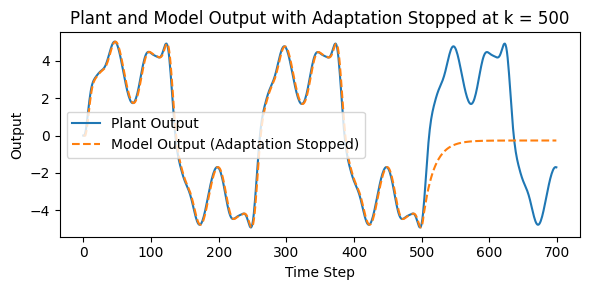

In [102]:
# Initialize parameters
timesteps = 700
y_p = [0, 0]  # Initial conditions for plant output
y_hat_p = [0, 0]  # Initial conditions for model output
nn = SimpleNeuralNetwork()

# First plot: Training phase with stopping adaptation at k=500
for k in range(0, timesteps):
    u_k = np.sin(2 * np.pi * k / 250)  # Sinusoidal input
    y_p_k = plant_output(y_p[-1], y_p[-2], u_k)
    y_p.append(y_p_k)
    
    # Stop updating the model after k = 500
    if k <= 500:
        u_input = np.array([[u_k]])
        approx_f_u = nn.train(u_input, np.array([[plant_function(u_k)]]))  # Train on current step
        y_hat_p_k = 0.3 * y_hat_p[-1] + 0.6 * y_hat_p[-2] + approx_f_u[0, 0]
    else:
        y_hat_p_k = 0.3 * y_hat_p[-1] + 0.6 * y_hat_p[-2] + nn.forward(u_input)[0, 0]# Model output without adaptation
    
    y_hat_p.append(y_hat_p_k)

# Plot for Fig. 12(a)
plt.figure(figsize=(6, 3))
plt.plot(range(0, 700), y_p[0:700], label='Plant Output')
plt.plot(range(0, 700), y_hat_p[0:700], label='Model Output (Adaptation Stopped)', linestyle='dashed')
plt.xlabel('Time Step')
plt.ylabel('Output')
plt.title('Plant and Model Output with Adaptation Stopped at k = 500')
plt.legend()
plt.tight_layout()
plt.savefig('ex_1.pdf', format='pdf')
plt.show()

In [97]:
extended_timesteps = 50000
for k in range(700, 50000):
    u_k = np.random.uniform(-1, 1.01)  # Random input uniformly distributed in [-1, 1]
    # round u_k to 2 decimal places
    u_k = round(u_k, 2)
    # Calculate plant output with the original plant function
    y_p_k = plant_output(y_p[-1], y_p[-2], u_k)
    y_p.append(y_p_k)
    
    # Continue training the model with random inputs
    u_input = np.array([[u_k]])
    approx_f_u = nn.train(u_input, np.array([[plant_function(u_k)]]))  # Train on current step
    y_hat_p_k = 0.3 * y_hat_p[-1] + 0.6 * y_hat_p[-2] + approx_f_u[0, 0]
    
    y_hat_p.append(y_hat_p_k)

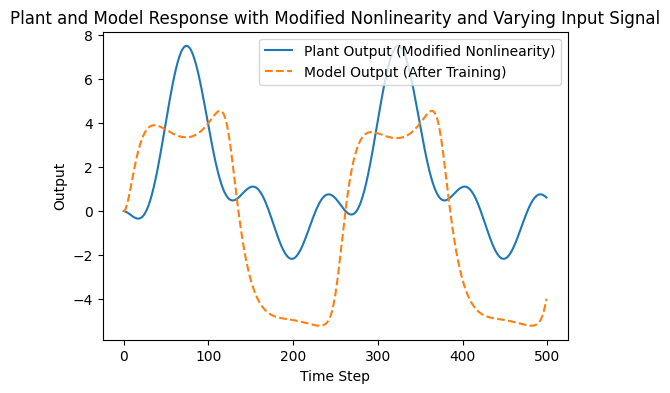

In [80]:
# Adjusted modified plant function with scaling to control output range
def modified_plant_function(u):
    return (u**3 + 0.3 * (u**2) - 0.4*u)

# Define the plant equation y_p with the modified nonlinearity
def plant_output_modified(y_p_k, y_p_k_minus_1, u_k):
    return 0.3 * y_p_k + 0.6 * y_p_k_minus_1 + modified_plant_function(u_k)

# Initialize parameters for testing phase with the new input signal
testing_timesteps = 500
# y_p_test = [y_p[-2], y_p[-1]]  # Start with the last two outputs from training
# y_hat_p_test = [y_hat_p[-2], y_hat_p[-1]]  # Start with the last two model outputs

y_p_test = [0, 0]  # Start with the last two outputs from training
y_hat_p_test = [0, 0]  # Start with the last two model outputs


# Generate the input signal: single sinusoidal for k < 250, sum of two sinusoids for k >= 250
# u_test_vals = [
#     np.sin(2 * np.pi * k / 250) if k < 250 else np.sin(2 * np.pi * k / 250) + np.sin(2 * np.pi * k / 25)
#     for k in range(testing_timesteps)
# ]

u_test_vals = [
    np.sin(2 * np.pi * k / 250) for k in range(testing_timesteps)
]


# Simulate the plant and model outputs for 500 time steps with modified nonlinearity and varying input
for u_k in u_test_vals:
    # Calculate plant output with modified nonlinearity
    y_p_k = plant_output_modified(y_p_test[-1], y_p_test[-2], u_k)
    y_p_test.append(y_p_k)
    
    # Use the trained model to predict the output (no further training)
    approx_f_u = nn.forward(np.array([[u_k]]))
    y_hat_p_k = 0.3 * y_hat_p_test[-1] + 0.6 * y_hat_p_test[-2] + approx_f_u[0, 0]
    y_hat_p_test.append(y_hat_p_k)

# Plot for Fig. 12(b) - Testing phase with modified plant nonlinearity and varying input signal
plt.figure(figsize=(6, 4))
plt.plot(range(testing_timesteps), y_p_test[2:], label='Plant Output (Modified Nonlinearity)')
plt.plot(range(testing_timesteps), y_hat_p_test[2:], label='Model Output (After Training)', linestyle='dashed')
plt.xlabel('Time Step')
plt.ylabel('Output')
plt.title('Plant and Model Response with Modified Nonlinearity and Varying Input Signal')
plt.legend()
plt.show()

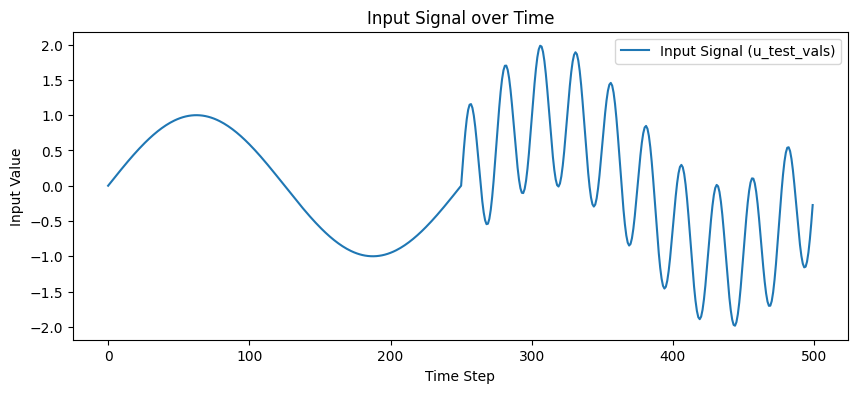

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(u_test_vals, label='Input Signal (u_test_vals)')
plt.xlabel('Time Step')
plt.ylabel('Input Value')
plt.title('Input Signal over Time')
plt.legend()
plt.show()